In [1]:
# Project: Book Review Sentiment Analysis
# Phase 1: Data Acquisition and Exploration

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Load the Dataset
df = pd.read_csv('data/raw/all_kindle_reviews.csv')

print("--- Initial Data Exploration ---")

# 3.1. Check the first few rows to see what the data looks like
print("\nFirst few rows of the dataset:")
print(df.head())

# 3.2. Check for missing values
print("\nGet a summary of the dataset:")
print(df.info())

# 3.3. Check for duplicates
print("\nNumber of duplicate reviews:")
print(df.duplicated().sum())

# 3.4. Check for missing review text
print("\nMissing values in 'reviewText' column:")
print(df['reviewText'].isnull().sum())

# 3.5. Check the rating distribution
print("\nDistribution of Ratings:")
print(df['rating'].value_counts())

--- Initial Data Exploration ---

First few rows of the dataset:
   Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0             0       11539  B0033UV8HI  [8, 10]       3   
1             1        5957  B002HJV4DE   [1, 1]       5   
2             2        9146  B002ZG96I4   [0, 0]       3   
3             3        7038  B002QHWOEU   [1, 3]       3   
4             4        1776  B001A06VJ8   [0, 1]       4   

                                          reviewText   reviewTime  \
0  Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1  Great short read.  I didn't want to put it dow...   10 8, 2013   
2  I'll start by saying this is the first of four...  04 11, 2014   
3  Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4  I did not expect this type of book to be in li...  12 31, 2012   

       reviewerID  reviewerName                   summary  unixReviewTime  
0  A3HHXRELK8BHQG        Ridley  Entertaining But Average      1283385600  
1  A2RG

--- Exploratory Data Analysis (EDA) ---


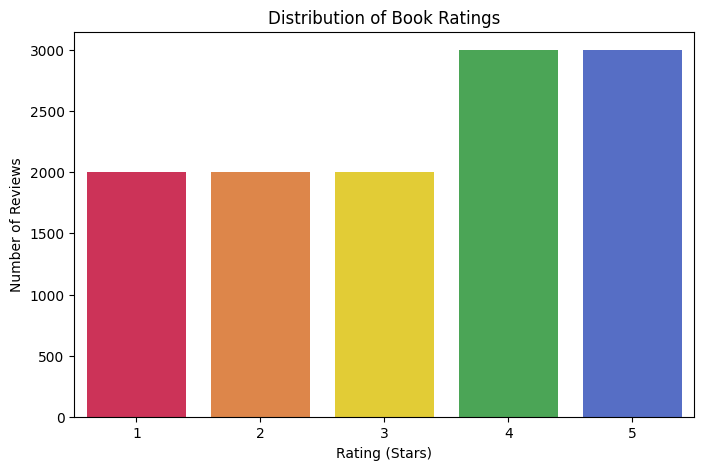

In [2]:
print("--- Exploratory Data Analysis (EDA) ---")

# 4.1. Create the 'images' directory if it does not exist yet
if not os.path.exists('images'):
    os.makedirs('images')

# 4.2. Visualise the rating distribution
custom_palette = ['#e6194b', '#f58231', '#ffe119', '#3cb44b', '#4363d8']

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='rating', data=df, hue='rating', palette=custom_palette)
ax.legend_.remove()
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.savefig('images/ph1_rating_distribution.png')
# plt.show() # uncomment this line to display this visual while running the notebook

Original number of reviews: 12000
Number of reviews remaining after dropping the 3-star reviews: 10000

Final Distribution of Binary Sentiment:
sentiment
1    6000
0    4000
Name: count, dtype: int64


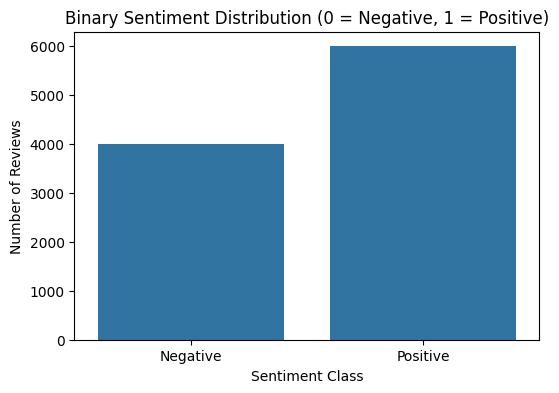

In [3]:
# Phase 2: Data Preprocessing and Feature Engineering

# 1.1 Sentiment Mapping and Data Filtering
# Converts the 5-class rating system (1 to 5 stars) into  a 2-class sentiment system (Positive or Negative) and
# removes the ambiguous 3-star reviews as they are often considered neutral for a binary sentiment classification task.
# 4 and 5 stars are mapped to Positive (1), and 1 and 2 stars are mapped to Negative (0).

# Define the conditions and values
sentiment_map = {
    5: 1, # Positive
    4: 1, # Positive
    2: 0, # Negative
    1: 0 # Negative
}

# Create the 'sentiment' column based on the mapping
# Any rating not in the map, i.e. 3, will result in a NaN value initially
df['sentiment'] = df['rating'].map(sentiment_map)

# Drop the 3-star neutral reviews
# This applies to rows where 'sentiment' is NaN
print(f"Original number of reviews: {len(df)}")
df.dropna(subset=['sentiment'], inplace=True)
print(f"Number of reviews remaining after dropping the 3-star reviews: {len(df)}")

# Convert the 'sentiment' column to an integer type
df['sentiment'] = df['sentiment'].astype(int)

# Final check on the distribution
print("\nFinal Distribution of Binary Sentiment:")
print(df['sentiment'].value_counts())

# Visualise the new binary distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Binary Sentiment Distribution (0 = Negative, 1 = Positive)')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.savefig('images/ph2_binary_sentiment_distribution.png')
# plt.show() # uncomment this line to display this visual while running the notebook

In [4]:
# 1.2 Text Cleaning
# Removes noise and standardises the text data to improve the quality of the features that the model will learn from.

# Import additional libraries
import re
import string
import time

start_time = time.time()

# Initialise a function to perform standard text cleaning operations
def clean_text(text):
    """
    Performs standard text cleaning operations:
    1. Lowercasing
    2. Removing URLs
    3. Removing HTML tags
    4. Removing punctuation
    5. Removing numbers
    """

    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub('http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing punctuation (using a predefined string of punctuation characters)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Removing extra whitespace / newlines
    text = re.sub('\n', ' ', text)
    text = ' '.join(text.split())

    return text

# Apply the cleaning function to the 'reviewText' column
df['cleaned_text'] = df['reviewText'].apply(clean_text)

end_time = time.time()

# Check the results
print(f"\nTime taken for text cleaning: {end_time - start_time:.2f} seconds")
print("\nBefore cleaning (sample):")
print(df['reviewText'].iloc[0])

print("\nAfter cleaning (sample):")
print(df['cleaned_text'].iloc[0])


Time taken for text cleaning: 0.31 seconds

Before cleaning (sample):
Great short read.  I didn't want to put it down so I read it all in one sitting.  The sex scenes were great between the two males and one female character...a bit surprising - I never thought you could do that!  I learned something new and really enjoyed reading this book!  This is a great way to get all hot and bothered and take advantage of your significant other(s)!

After cleaning (sample):
great short read i didnt want to put it down so i read it all in one sitting the sex scenes were great between the two males and one female charactera bit surprising i never thought you could do that i learned something new and really enjoyed reading this book this is a great way to get all hot and bothered and take advantage of your significant others


In [5]:
# 1.3 Text Normalisation
# Refines the words themselves by using Tokenisation, Stop Word Removal and Lemmatisation.

# Import additional libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialise the Lemmatiser and Stopword list
lemmatiser = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def normalise_text(text):
    """
    1. Tokenises text into words
    2. Removes stop words
    3. Lemmatises words to their base form
    """

    # Tokenisation
    tokens = word_tokenize(text)

    # Stop word removal and lemmatisation
    # Filters out the stop words and lemmatise the remaining tokens in one pass
    filtered_lemmatised_text = [
        lemmatiser.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]

    # Rejoining of tokens back into a single string for vectorisation
    return " ".join(filtered_lemmatised_text)

# Apply normalisation to the 'cleaned_text' column
start_time = time.time()
df['normalised_text'] = df['cleaned_text'].apply(normalise_text)
end_time = time.time()

print(f"\nTime taken to normalise text: {end_time - start_time:.2f} seconds")

# Compare a sample to see the progress
print("\nCleaned text (before normalisation):")
print(df['cleaned_text'].iloc[10]) # looks at index 10 for variety

print("\nNormalised text (after normalisation):")
print(df['normalised_text'].iloc[10])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/lorie_y/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lorie_y/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lorie_y/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Time taken to normalise text: 7.73 seconds

Cleaned text (before normalisation):
i just finished a reread of wicked garden and all i can say is wow even in a novella lorelei james can write stories so hot your ereader starts smokinwicked garden is a short story about lost loves reuniting with a little extra sumthin sumthin billy buchanan returns to spearfish as a favor for a business associate he agreed as a favor but also because it would give him a chance to reignite the spark from his high school flame eden lacroix for the past ten years he has regretted walking away from eden eden has spent the last ten years building a career and dedicated to the local community center helping at risk kids she hasnt had time for real relationships just the occasional no strings attached hook ups with sexy native american rock star jon white featherwhen billy and eden see each other for the first time in ten years the chemistry spikes off the charts but eden is determined to fight it because billy

In [6]:
# 1.4 Vectorisation (TF-IDF) and Data Splitting
# Converts the text into a numerical matrix and splits the data for model evaluation later.

# Import additional libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialise the TF-IDF vectoriser
# The 'max_features' parameter is limited to 5000 so as to keep the model efficient and prevent overfitting
tfidf = TfidfVectorizer(max_features=5000)

# Transform the normalised text into numerical features (X)
X = tfidf.fit_transform(df['normalised_text'])

# Define the target variable (y)
y = df['sentiment']

# Split the data into training (80%) and testing (20%) sets
# The 'random_state' parameter ensures reproducibility
# The 'stratify' parameter keeps the class balance equal
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Feature matrix shape: {X.shape}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Feature matrix shape: (10000, 5000)
Training set size: 8000
Testing set size: 2000


In [7]:
# Phase 3: Model Building and Evaluation

# Import additional libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 1.1 Train the Model

# Initialise the model
# The 'max_iter' parameter is used to give the solver enough time to find the best fit
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Overall model accuracy: 88.70%
Weighted F1-score: 88.62%

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.89      0.82      0.85       800
    Positive       0.89      0.93      0.91      1200

    accuracy                           0.89      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000



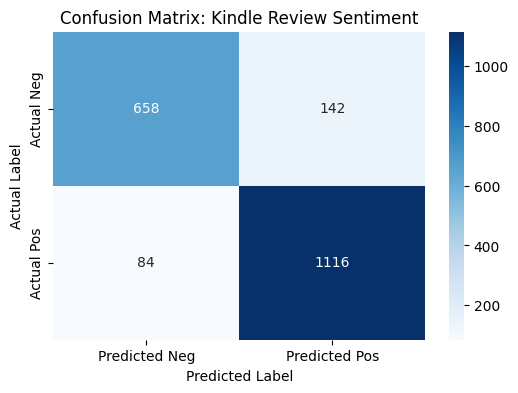

In [8]:
# 1.2 Evaluate the Results

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall model accuracy: {accuracy:.2%}")

# F1-score
# The 'weighted' argument is used to account for any slight remaining class imbalance
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1:.2%}")

# Detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Visualisation of confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Neg', 'Predicted Pos'],
            yticklabels=['Actual Neg', 'Actual Pos'])
plt.title('Confusion Matrix: Kindle Review Sentiment')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('images/ph3_confusion_matrix.png')
# plt.show() # uncomment this line to display this visual while running the notebook